In [24]:
import tensorflow as tf

### Gradient Calculation Example

In [25]:
input_var = tf.Variable(initial_value=3.)

with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient.numpy()

6.0

### Second Derivative Example

In [27]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration.numpy())
speed.numpy()

9.8


0.0

### Data Generation for Simple Binary Classification


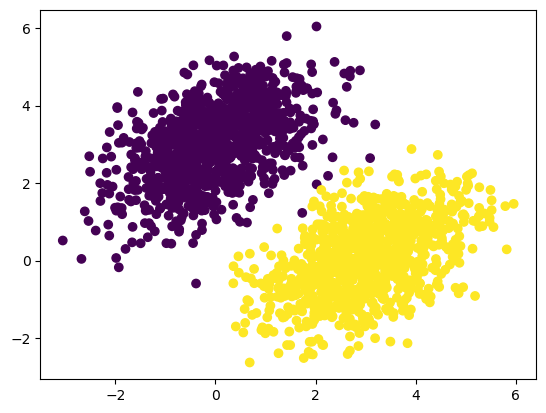

In [28]:
import matplotlib.pyplot as plt
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, .5], [.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, .5], [.5, 1]], size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                        np.ones((num_samples_per_class, 1), dtype='float32')))

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

### Simple Linear Model

In [29]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [30]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [31]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [32]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_W, grad_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_W * learning_rate)
    b.assign_sub(grad_b * learning_rate)
    return loss

In [33]:
for step in range(40):
    loss = training_step(inputs, targets)
    print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 1.2974
Loss at step 1: 0.2216
Loss at step 2: 0.1199
Loss at step 3: 0.1017
Loss at step 4: 0.0941
Loss at step 5: 0.0882
Loss at step 6: 0.0830
Loss at step 7: 0.0782
Loss at step 8: 0.0738
Loss at step 9: 0.0697
Loss at step 10: 0.0660
Loss at step 11: 0.0626
Loss at step 12: 0.0595
Loss at step 13: 0.0567
Loss at step 14: 0.0541
Loss at step 15: 0.0517
Loss at step 16: 0.0495
Loss at step 17: 0.0475
Loss at step 18: 0.0456
Loss at step 19: 0.0440
Loss at step 20: 0.0424
Loss at step 21: 0.0410
Loss at step 22: 0.0397
Loss at step 23: 0.0385
Loss at step 24: 0.0374
Loss at step 25: 0.0364
Loss at step 26: 0.0355
Loss at step 27: 0.0347
Loss at step 28: 0.0339
Loss at step 29: 0.0332
Loss at step 30: 0.0326
Loss at step 31: 0.0320
Loss at step 32: 0.0314
Loss at step 33: 0.0309
Loss at step 34: 0.0305
Loss at step 35: 0.0301
Loss at step 36: 0.0297
Loss at step 37: 0.0293
Loss at step 38: 0.0290
Loss at step 39: 0.0287


### Plotting the decision boundary after training

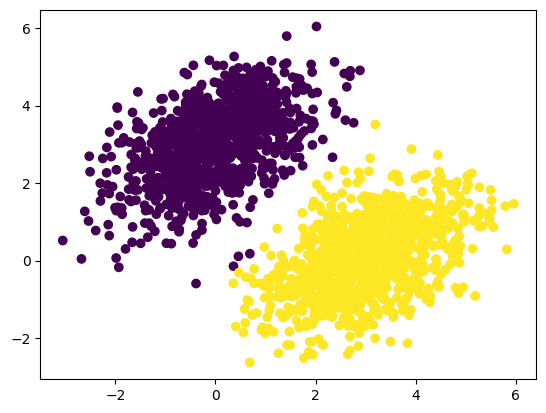

In [34]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

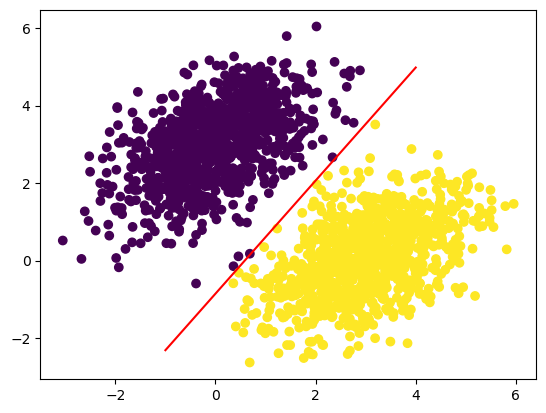

In [35]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

# Anatomy of a neural network: Understanding core Keras APIs


In [36]:
# Creating a Custom Dense Layer
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super(SimpleDense, self).__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros')

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [37]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


### Building a Sequential Model with Keras

In [38]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation='relu')

In [39]:
from tensorflow.keras import Model
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32)
])

In [40]:
model = tf.keras.Sequential([
    SimpleDense(32, activation='relu'),
    SimpleDense(64, activation='relu'),
    SimpleDense(32, activation='relu'),
    SimpleDense(10)
])

In [41]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [42]:
# Alternatively, compile using optimizer and loss from keras API
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [43]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.5195 - loss: 19.9612
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5023 - loss: 19.1864 
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.4956 - loss: 18.0474 
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5063 - loss: 18.0777 
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.5065 - loss: 17.2802 


In [44]:
history.history

{'binary_accuracy': [0.5005000233650208,
  0.5,
  0.49900001287460327,
  0.49900001287460327,
  0.49900001287460327],
 'loss': [19.58636474609375,
  18.8809757232666,
  18.27721405029297,
  17.700225830078125,
  17.134048461914062]}

### Data Shuffling and Validation Split

In [45]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 0.7808 - loss: 2.4381 - val_binary_accuracy: 0.9950 - val_loss: 0.0389
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9649 - loss: 0.0617 - val_binary_accuracy: 0.9967 - val_loss: 0.0363
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9544 - loss: 0.0771 - val_binary_accuracy: 0.9967 - val_loss: 0.0380
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9532 - loss: 0.0753 - val_binary_accuracy: 0.9967 - val_loss: 0.0525
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9659 - loss: 0.0679 - val_binary_accuracy: 0.9950 - val_loss: 0.0330


#### Making predictions on the validation data


In [46]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[-0.01743031]
 [ 0.97147167]
 [ 0.87969273]
 [ 0.4251368 ]
 [ 0.94883287]
 [-0.15323329]
 [ 1.1078992 ]
 [-0.05335605]
 [ 1.0025227 ]
 [ 0.13990551]]
